In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from matplotlib_venn import venn2

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


2024-08-21 15:42:27.004920: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 15:42:27.064981: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 15:42:27.454840: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 15:42:27.456922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 15:42:28.207491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.24.3 scipy==1.13.0 pandas==1.5.3 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.11.4 pynndescent==0.5.12


# read in and concatenate all h5ad files

In [2]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/sciplex/"

# this data is downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4150378
# I used the RDS files -- DO NOT USE THE OTHER FILE TYPES
# they have gene names that are off by 1
# I took the RDS files, then converted them to anndata using sceasy 

results_file = f"{data_path}/sciplex_processed.h5ad"

in_file = f"{data_path}/GSM4150378_sciPlex3_A549_24hrs.h5ad"
adata_A549 = sc.read_h5ad(in_file)
adata_A549.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

in_file = f"{data_path}/GSM4150378_sciPlex3_K562_24hrs.h5ad"
adata_K562 = sc.read_h5ad(in_file)
adata_K562.var_names_make_unique() 


in_file = f"{data_path}/GSM4150378_sciPlex3_MCF7_24hrs.h5ad"
adata_MCF7 = sc.read_h5ad(in_file)
adata_MCF7.var_names_make_unique() 

adata = adata_A549.concatenate(adata_K562, adata_MCF7)



/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being

# format metadata

In [3]:
# get additional metadata
in_file = f"{data_path}/SrivatsanTrapnell2020_sciplex3.h5ad"
adata_meta = sc.read_h5ad(in_file)
extra_meta = adata_meta.obs


In [4]:
extra_meta

,ncounts,well,plate,cell_line,replicate,time,dose_value,pathway_level_1,pathway_level_2,perturbation,...,disease,cancer,tissue_type,organism,perturbation_type,ngenes,percent_mito,percent_ribo,nperts,chembl-ID
cell_barcode,,,,,,,,,,,,,,,,,,,,,
A01_E09_RT_BC_100_Lig_BC_147,2957,plate6_A9,plate44,MCF7,rep2,24.0,10000.0,Tyrosine kinase signaling,RTK activity,TAK-901,...,breast adenocarcinoma,True,cell_line,human,drug,1655,0.0,0.0,1,CHEMBL3544932
A01_E09_RT_BC_100_Lig_BC_186,1528,plate8_H3,plate46,MCF7,rep2,24.0,10.0,Tyrosine kinase signaling,RTK activity,AG-490 (Tyrphostin B42),...,breast adenocarcinoma,True,cell_line,human,drug,975,0.0,0.0,1,CHEMBL1257042
A01_E09_RT_BC_100_Lig_BC_196,1881,plate3_C2,plate41,MCF7,rep2,24.0,1000.0,Epigenetic regulation,Histone deacetylation,Abexinostat (PCI-24781),...,breast adenocarcinoma,True,cell_line,human,drug,1176,0.0,0.0,1,CHEMBL2103863
A01_E09_RT_BC_100_Lig_BC_213,1700,plate9_E3,plate51,A549,rep2,72.0,1000.0,Cell cycle regulation,Aurora kinase activity,Alisertib (MLN8237),...,lung adenocarcinoma,True,cell_line,human,drug,1081,0.0,0.0,1,CHEMBL483158
A01_E09_RT_BC_100_Lig_BC_220,1430,plate8_H10,plate30,K562,rep2,24.0,10000.0,DNA damage & DNA repair,Alkylating agent,Busulfan,...,chronic myelogenous leukemia,True,cell_line,human,drug,1009,0.0,0.0,1,CHEMBL820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_F10_RT_BC_9_Lig_BC_237,759,plate5_C2,plate43,MCF7,rep2,24.0,1000.0,Antioxidant,Antioxidant,Quercetin,...,breast adenocarcinoma,True,cell_line,human,drug,430,0.0,0.0,1,CHEMBL50
H12_F10_RT_BC_9_Lig_BC_274,1108,plate8_B9,plate6,K562,rep1,24.0,10.0,Nuclear receptor signaling,Nuclear receptor activity,Andarine,...,chronic myelogenous leukemia,True,cell_line,human,drug,520,0.0,0.0,1,NaN
H12_F10_RT_BC_9_Lig_BC_291,714,plate3_B8,plate41,MCF7,rep2,24.0,100.0,DNA damage & DNA repair,ADP-rybosilation,Iniparib (BSI-201),...,breast adenocarcinoma,True,cell_line,human,drug,495,0.0,0.0,1,CHEMBL1170047


In [5]:
adata.obs.index = adata.obs.cell
adata.obs

,cell,Size_Factor,n.umi,hash_umis_W,pval_W,qval_W,top_to_second_best_ratio_W,top_oligo_W,hash_umis_P,pval_P,...,viability,num_genes_expressed,g1s_score,g2m_score,proliferation_index,UMAP_1,UMAP_2,Cluster,louvain_component,batch
cell,,,,,,,,,,,,,,,,,,,,,
A01_E09_RT_BC_100_Lig_BC_245,A01_E09_RT_BC_100_Lig_BC_245,2.296651,3094.0,373.0,0.0,0.0,52.807724,plate9_C3,209.0,0.000000e+00,...,0.999924,1571,1.155964,2.475312,2.643512,0.581948,2.276925,1,2,0
A01_E09_RT_BC_100_Lig_BC_306,A01_E09_RT_BC_100_Lig_BC_306,0.480141,646.0,23.0,0.0,0.0,10.053193,plate10_D6,25.0,1.067310e-191,...,0.997575,417,0.000000,1.980748,1.980748,-0.056993,-3.542004,2,2,0
A01_E09_RT_BC_101_Lig_BC_109,A01_E09_RT_BC_101_Lig_BC_109,0.516561,695.0,93.0,0.0,0.0,27.803759,plate6_G5,117.0,0.000000e+00,...,1.000000,421,0.000000,0.000000,0.000000,-0.146081,-3.131009,2,2,0
A01_E09_RT_BC_101_Lig_BC_229,A01_E09_RT_BC_101_Lig_BC_229,0.387978,523.0,75.0,0.0,0.0,63.947847,plate8_C5,101.0,0.000000e+00,...,0.999966,428,1.817254,2.801225,3.073606,-4.014621,0.222209,7,2,0
A01_E09_RT_BC_101_Lig_BC_280,A01_E09_RT_BC_101_Lig_BC_280,0.724671,976.0,102.0,0.0,0.0,25.832608,plate3_G1,127.0,0.000000e+00,...,0.953656,714,1.637016,0.867074,1.874835,-2.132526,2.235654,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_F10_RT_BC_99_Lig_BC_324,H12_F10_RT_BC_99_Lig_BC_324,0.771345,1952.0,77.0,0.0,0.0,8.884067,plate10_F3,147.0,0.000000e+00,...,1.000000,1077,2.012524,1.587051,2.431109,-0.342362,-4.267474,11,2,2
H12_F10_RT_BC_9_Lig_BC_23,H12_F10_RT_BC_9_Lig_BC_23,0.563387,1427.0,87.0,0.0,0.0,22.672498,plate10_B9,82.0,3.991777e-243,...,1.000000,751,2.091854,0.000000,2.091854,-3.169727,-0.567785,2,2,2
H12_F10_RT_BC_9_Lig_BC_237,H12_F10_RT_BC_9_Lig_BC_237,0.299287,759.0,55.0,0.0,0.0,44.984499,plate5_C2,58.0,8.875670e-159,...,0.999997,428,2.664802,3.794063,4.057018,0.174866,3.472989,7,2,2


In [6]:
extra_meta.columns

Index(['ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time',
       'dose_value', 'pathway_level_1', 'pathway_level_2', 'perturbation',
       'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'cancer',
       'tissue_type', 'organism', 'perturbation_type', 'ngenes',
       'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID'],
      dtype='object')

In [7]:
adata.obs.columns

Index(['cell', 'Size_Factor', 'n.umi', 'hash_umis_W', 'pval_W', 'qval_W',
       'top_to_second_best_ratio_W', 'top_oligo_W', 'hash_umis_P', 'pval_P',
       'qval_P', 'top_to_second_best_ratio_P', 'top_oligo_P', 'rt_well',
       'lig_well', 'pcr_well', 'pcr_plate', 'culture_plate', 'rt_plate',
       'lig_plate', 'Combo', 'well_oligo', 'plate_oligo', 'replicate',
       'drug_dose', 'catalog_number', 'vehicle', 'dose_pattern',
       'dose_character', 'dose', 'treatment', 'pathway_level_1',
       'pathway_level_2', 'product_name', 'target', 'pathway', 'product_dose',
       'viability', 'num_genes_expressed', 'g1s_score', 'g2m_score',
       'proliferation_index', 'UMAP_1', 'UMAP_2', 'Cluster',
       'louvain_component', 'batch'],
      dtype='object')

In [8]:
extra_meta[["perturbation", "cell_line", "dose_value", "dose_unit"]]

,perturbation,cell_line,dose_value,dose_unit
cell_barcode,,,,
A01_E09_RT_BC_100_Lig_BC_147,TAK-901,MCF7,10000.0,nM
A01_E09_RT_BC_100_Lig_BC_186,AG-490 (Tyrphostin B42),MCF7,10.0,nM
A01_E09_RT_BC_100_Lig_BC_196,Abexinostat (PCI-24781),MCF7,1000.0,nM
A01_E09_RT_BC_100_Lig_BC_213,Alisertib (MLN8237),A549,1000.0,nM
A01_E09_RT_BC_100_Lig_BC_220,Busulfan,K562,10000.0,nM
...,...,...,...,...
H12_F10_RT_BC_9_Lig_BC_237,Quercetin,MCF7,1000.0,nM
H12_F10_RT_BC_9_Lig_BC_274,Andarine,K562,10.0,nM
H12_F10_RT_BC_9_Lig_BC_291,Iniparib (BSI-201),MCF7,100.0,nM


In [9]:
# remove the repetitive columns from extra_meta, then join
all_meta = adata.obs.join(extra_meta[["perturbation", "cell_line", "dose_value", "dose_unit"]])
adata.obs = all_meta

# format genes

In [10]:
# reduce to the genes in L1000
l1000_file = f"{os.getcwd()}/../../data/bulk_data/l1000/l1000_bulk_processed.h5ad"
adata_l1000 = sc.read_h5ad(l1000_file)
adata_l1000.var

,pr_gene_id,pr_gene_symbol
pr_gene_symbol,,
AARS,16,AARS
ABCF1,23,ABCF1
ABL1,25,ABL1
ACAA1,30,ACAA1
ACAT2,39,ACAT2
...,...,...
TXLNA,200081,TXLNA
SPRED2,200734,SPRED2
EML3,256364,EML3


In [11]:
adata.var

,id,gene_short_name,num_cells_expressed-0,num_cells_expressed-1,num_cells_expressed-2
ENSG00000000003.14,ENSG00000000003.14,TSPAN6,4017,199,13320
ENSG00000000005.5,ENSG00000000005.5,TNMD,3,3,14
ENSG00000000419.12,ENSG00000000419.12,DPM1,8442,11231,72353
ENSG00000000457.13,ENSG00000000457.13,SCYL3,4386,3380,24120
ENSG00000000460.16,ENSG00000000460.16,C1orf112,5998,9555,24454
...,...,...,...,...,...
ENSG00000284744.1,ENSG00000284744.1,AL591163.1,8,27,26
ENSG00000284745.1,ENSG00000284745.1,AL589702.1,2,0,3
ENSG00000284746.1,ENSG00000284746.1,AC068587.10,0,0,0
ENSG00000284747.1,ENSG00000284747.1,AL034417.4,230,634,675


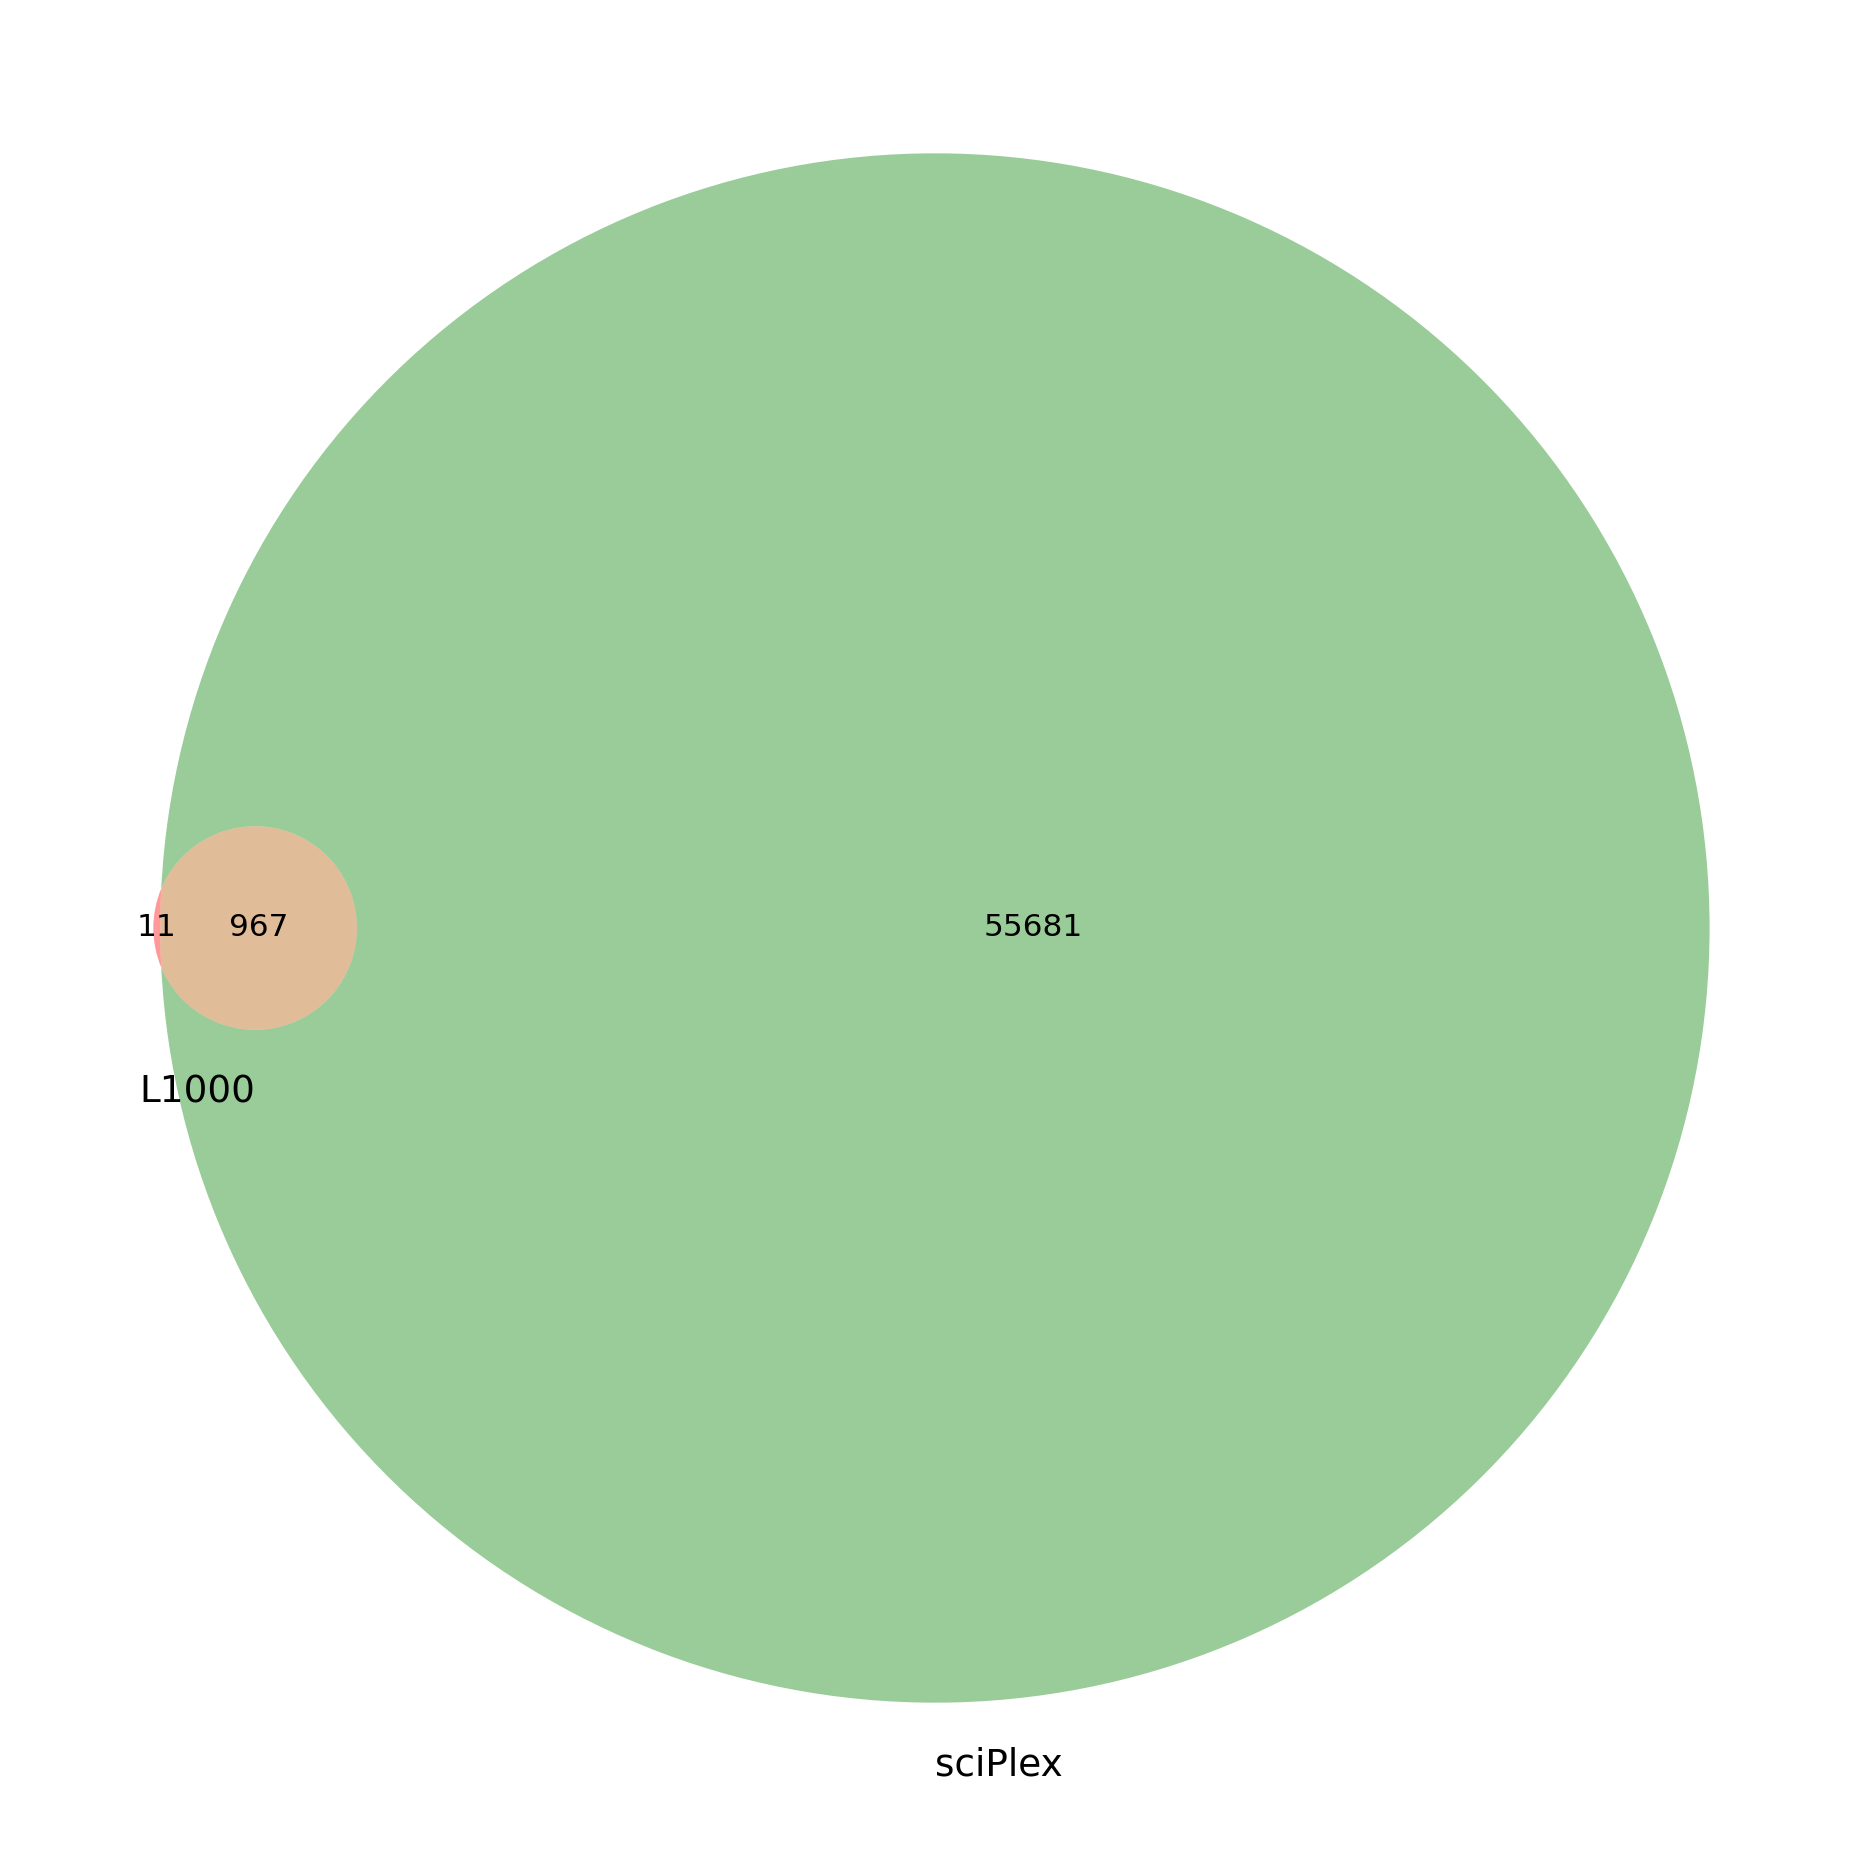

In [12]:
fig=plt.figure(figsize=(15, 15))
venn2([set(adata_l1000.var["pr_gene_symbol"].to_list()), set(adata.var["gene_short_name"].to_list())], set_labels = ('L1000', 'sciPlex'))
plt.show()

In [13]:
# get intersection

keep_genes = np.intersect1d(adata_l1000.var["pr_gene_symbol"].to_list(), adata.var["gene_short_name"].to_list())
ens_keep_genes = adata.var.iloc[np.where(adata.var["gene_short_name"].isin(keep_genes))[0], ]
ens_keep_genes_idx = ens_keep_genes.id
adata = adata[:,ens_keep_genes_idx]

# now use the short name as the var index
adata.var.index = ens_keep_genes.gene_short_name


# get only Trichostatin and DMSO

In [14]:
keep_idx = np.where(adata.obs.product_name.str.contains("Trichostatin|Vehicle", regex=True))[0]
adata = adata[keep_idx]


In [15]:
adata

View of AnnData object with n_obs × n_vars = 16087 × 58347
    obs: 'cell', 'Size_Factor', 'n.umi', 'hash_umis_W', 'pval_W', 'qval_W', 'top_to_second_best_ratio_W', 'top_oligo_W', 'hash_umis_P', 'pval_P', 'qval_P', 'top_to_second_best_ratio_P', 'top_oligo_P', 'rt_well', 'lig_well', 'pcr_well', 'pcr_plate', 'culture_plate', 'rt_plate', 'lig_plate', 'Combo', 'well_oligo', 'plate_oligo', 'replicate', 'drug_dose', 'catalog_number', 'vehicle', 'dose_pattern', 'dose_character', 'dose', 'treatment', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'product_dose', 'viability', 'num_genes_expressed', 'g1s_score', 'g2m_score', 'proliferation_index', 'UMAP_1', 'UMAP_2', 'Cluster', 'louvain_component', 'batch', 'perturbation', 'cell_line', 'dose_value', 'dose_unit'
    var: 'id', 'gene_short_name', 'num_cells_expressed-0', 'num_cells_expressed-1', 'num_cells_expressed-2'
    obsm: 'X_pca', 'X_umap'

# Write and Plot

In [63]:
results_file

'/home/natalie/projects/checkouts/buddi_analysis/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/sciplex//sciplex_processed.h5ad'

In [64]:
adata.write(results_file)


/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/natalie/projec

extracting highly variable genes


/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:373: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


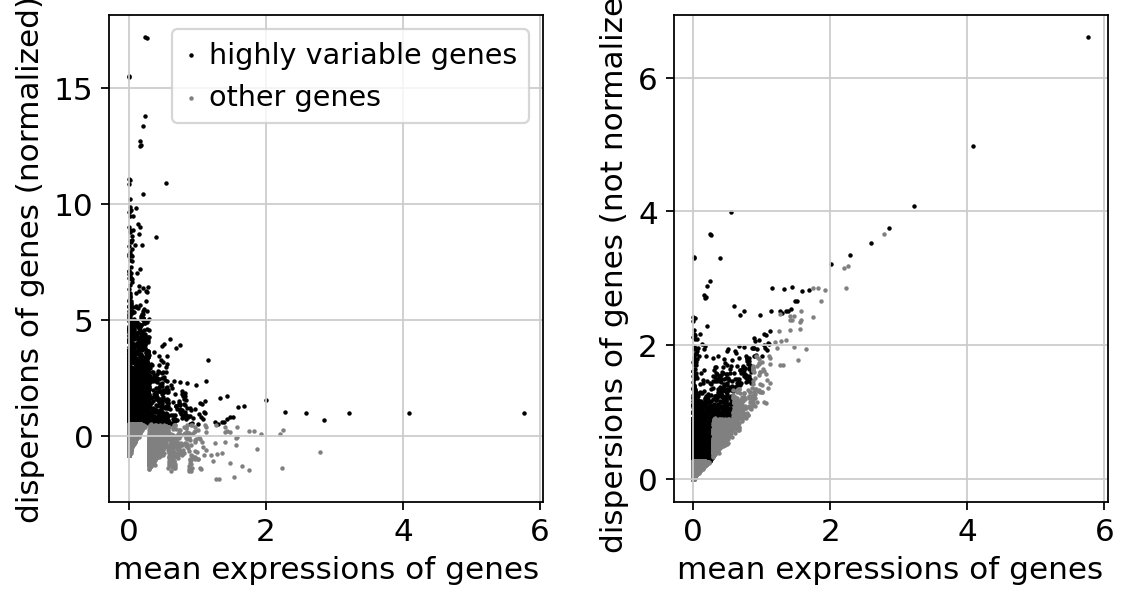

In [16]:
# normalize to 10K counts per cell
#sc.pp.normalize_total(adata, target_sum=1e6)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0, max_mean=15, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
#adata.raw = adata


# PCA

In [17]:
sc.tl.pca(adata, n_comps=10)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)


computing PCA
    on highly variable genes
    with n_comps=10
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:13)


/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


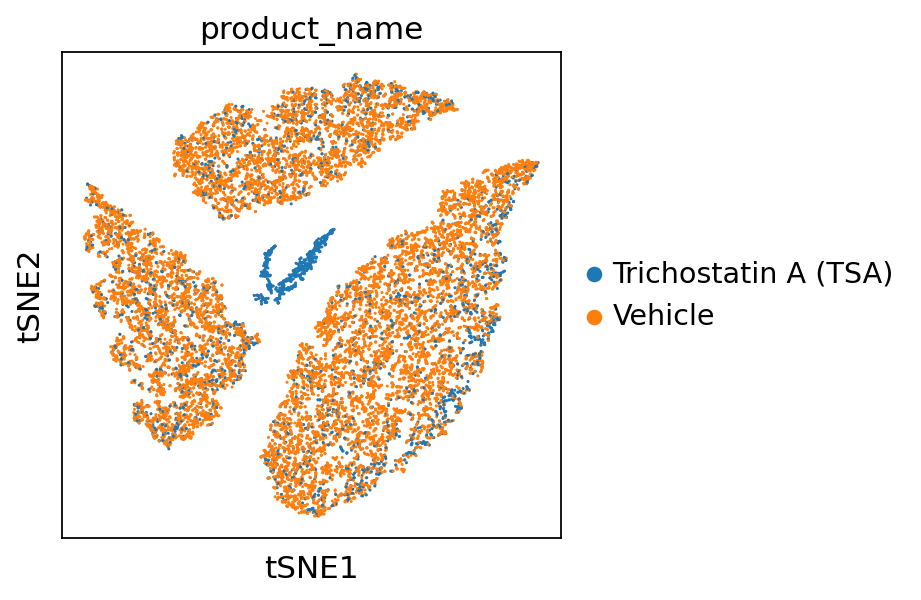

In [18]:
sc.pl.tsne(adata, color="product_name")

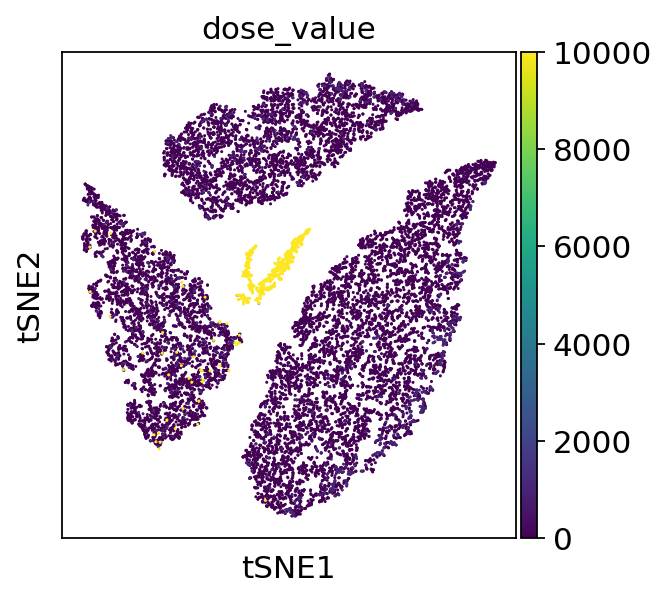

In [19]:
sc.pl.tsne(adata, color="dose_value")

/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


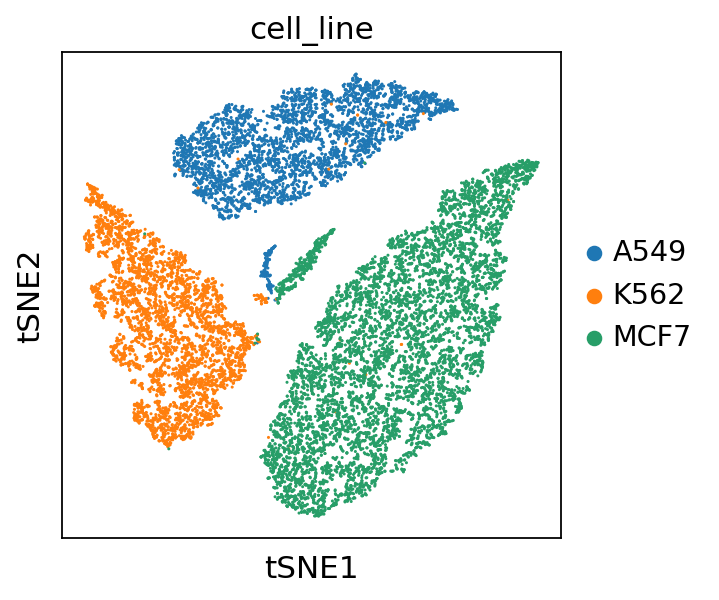

In [20]:
sc.pl.tsne(adata, color="cell_line")

/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


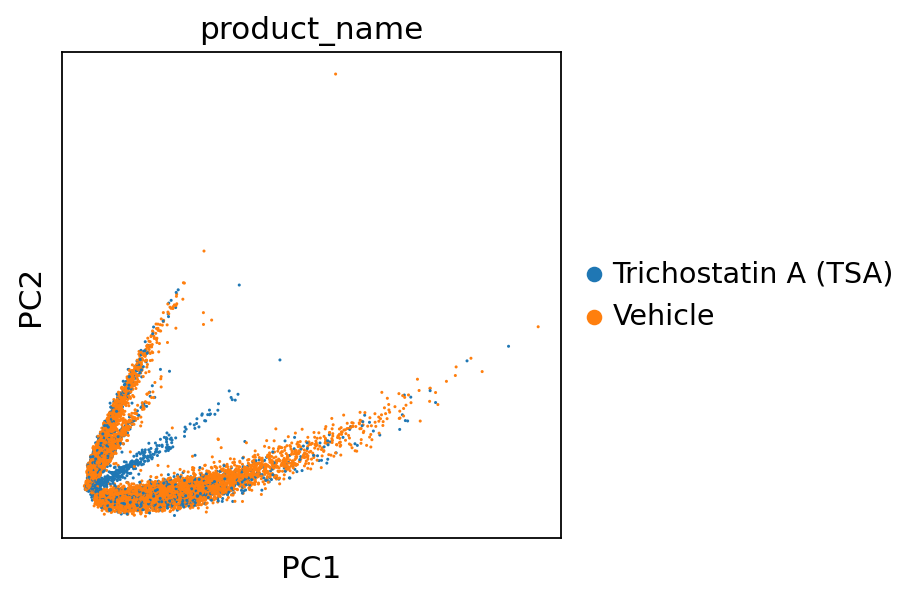

In [21]:
sc.pl.pca(adata, color="product_name")

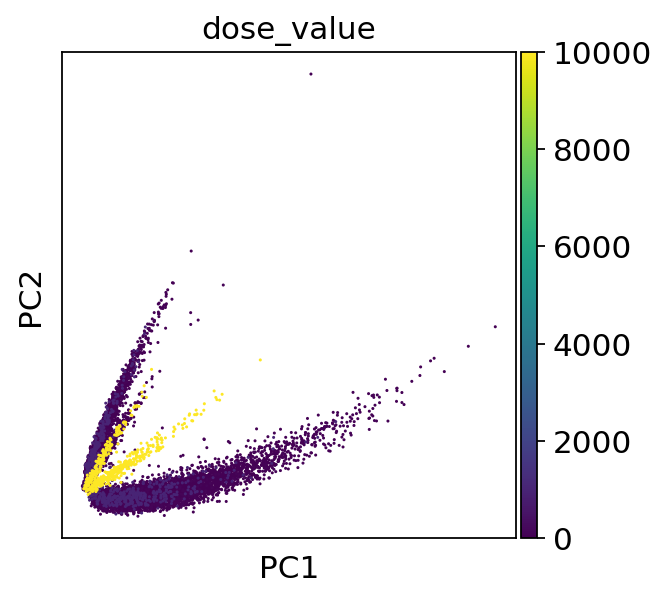

In [22]:
sc.pl.pca(adata, color="dose_value")

/home/natalie/projects/checkouts/buddi_atac/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


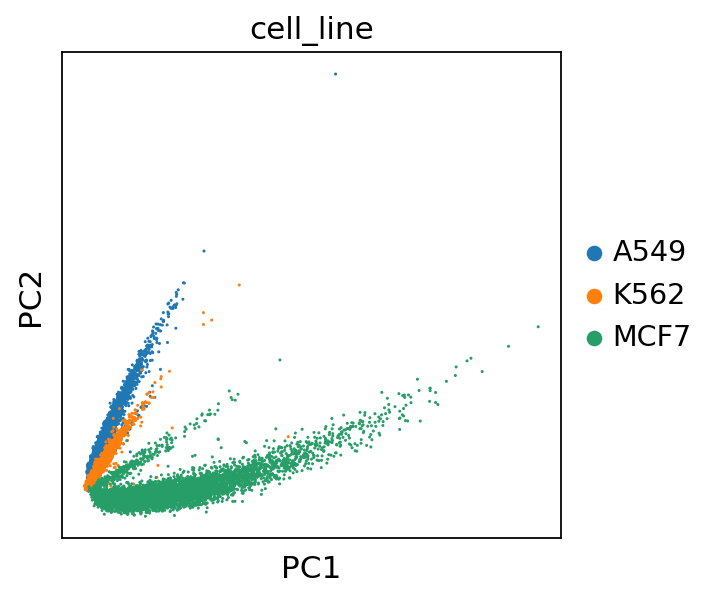

In [23]:
sc.pl.pca(adata, color="cell_line")

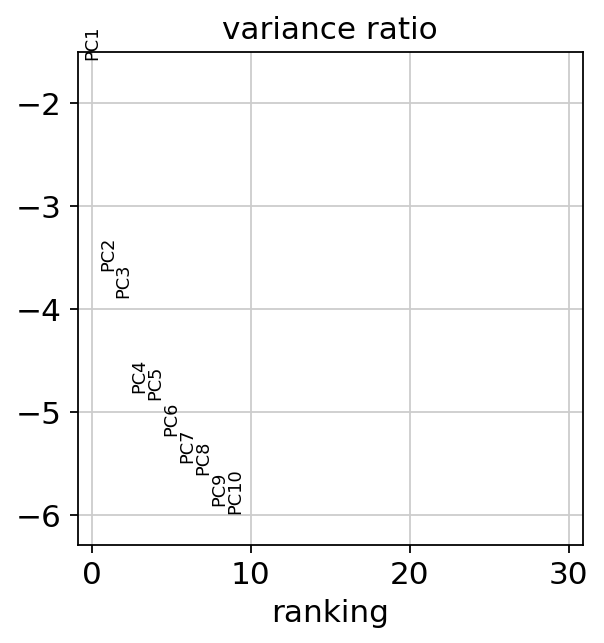

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)
